In [1]:
# Import dependencies and libraries
from IPython.display import clear_output
import pandas as pd
from census import Census
from us import states
from dotenv import load_dotenv
import requests
import sys
import csv
import os
import json
import time

# Load development mode
try:
  dev = os.getenv("DEV_MODE")
  if dev: print("Development mode loaded successfully!")
except:
  print("Error loading development mode")
  print("Defaulting to production mode")
  dev = False

# Load environment variables and U.S. Census API key
if dev: print("Loading environment variables...")
load_dotenv()
if dev: print("Environment variables loaded successfully!")
try:
  if dev: print("Loading U.S. Census API key...")
  api_key = os.getenv("CENSUS_API_KEY")
  if dev: print("API key loaded successfully!")
except:
  print("Error loading U.S. Census API key")
  print("Please check your environment variables")
  

Development mode loaded successfully!
Loading environment variables...
Environment variables loaded successfully!
Loading U.S. Census API key...
API key loaded successfully!


In [2]:
# Save the final census data to a CSV file
try:
  if dev: print("Saving final census data to a CSV file...")
  census_df.to_csv("data/census/clean_census_data.csv", index=False)
  print("Final census data saved to file successfully!")
except:
  print("Error saving final census data to file")


Saving final census data to a CSV file...
Error saving final census data to file


In [3]:
# Load the final census data from the CSV file
try:
  if dev: print("Loading final census data from the CSV file...")
  census_df = pd.read_csv("data/census/clean_census_data.csv")
  if dev: display(census_df.head())
  print("Final census data loaded from file successfully!")
except:
  print("Error loading final census data from file, please make sure the file exists.")


Loading final census data from the CSV file...


,County,Year,Median Household Income,Per Capita Income,Number of Employed (16+),Number of Unemployed (16+),Poverty Count,Median Age,Total Population,Average Year Home Built,Median Contract Rent,Average Cost of Rent and Utilities,Average Value of Owner-occupied Home,Average Monthly Housing Expense with Mortgage
0,"Adams County, Colorado",2011,56089.0,24384.0,232203.0,90191.0,60147.0,32.2,434295.0,1983.0,793.0,911.0,192300.0,1633.0
1,"Adams County, Colorado",2012,56633.0,24357.0,236474.0,92873.0,62008.0,32.4,442996.0,1983.0,819.0,947.0,188100.0,1604.0
2,"Adams County, Colorado",2013,56270.0,24195.0,239307.0,97298.0,63540.0,32.6,452030.0,1983.0,837.0,967.0,186600.0,1582.0
3,"Adams County, Colorado",2014,57421.0,24667.0,243917.0,100410.0,64599.0,32.8,461558.0,1983.0,871.0,1003.0,189400.0,1545.0
4,"Adams County, Colorado",2015,58946.0,25039.0,249893.0,102520.0,64241.0,33.0,471206.0,1984.0,905.0,1039.0,198800.0,1511.0


Final census data loaded from file successfully!


In [4]:
# Display the first and last 30 rows of the DataFrame
print("First 30 rows of the DataFrame:")
display(census_df.head(30))

print("Last 30 rows of the DataFrame:")
display(census_df.tail(30))


First 30 rows of the DataFrame:


,County,Year,Median Household Income,Per Capita Income,Number of Employed (16+),Number of Unemployed (16+),Poverty Count,Median Age,Total Population,Average Year Home Built,Median Contract Rent,Average Cost of Rent and Utilities,Average Value of Owner-occupied Home,Average Monthly Housing Expense with Mortgage
0,"Adams County, Colorado",2011,56089.0,24384.0,232203.0,90191.0,60147.0,32.2,434295.0,1983.0,793.0,911.0,192300.0,1633.0
1,"Adams County, Colorado",2012,56633.0,24357.0,236474.0,92873.0,62008.0,32.4,442996.0,1983.0,819.0,947.0,188100.0,1604.0
2,"Adams County, Colorado",2013,56270.0,24195.0,239307.0,97298.0,63540.0,32.6,452030.0,1983.0,837.0,967.0,186600.0,1582.0
3,"Adams County, Colorado",2014,57421.0,24667.0,243917.0,100410.0,64599.0,32.8,461558.0,1983.0,871.0,1003.0,189400.0,1545.0
4,"Adams County, Colorado",2015,58946.0,25039.0,249893.0,102520.0,64241.0,33.0,471206.0,1984.0,905.0,1039.0,198800.0,1511.0
5,"Adams County, Colorado",2016,61444.0,26051.0,254614.0,105112.0,61265.0,33.3,479977.0,1985.0,966.0,1098.0,216700.0,1508.0
6,"Adams County, Colorado",2017,64087.0,27487.0,260199.0,106639.0,59050.0,33.4,487850.0,1985.0,1040.0,1172.0,241900.0,1559.0
7,"Adams County, Colorado",2018,67575.0,28897.0,267927.0,107902.0,56588.0,33.6,497115.0,1986.0,1137.0,1270.0,273000.0,1621.0
8,"Adams County, Colorado",2019,71202.0,30313.0,273313.0,109320.0,54159.0,33.8,504108.0,1987.0,1205.0,1346.0,307600.0,1706.0
9,"Adams County, Colorado",2020,73817.0,31310.0,277135.0,111962.0,49946.0,34.0,509844.0,1988.0,1242.0,1387.0,335800.0,1795.0


Last 30 rows of the DataFrame:


,County,Year,Median Household Income,Per Capita Income,Number of Employed (16+),Number of Unemployed (16+),Poverty Count,Median Age,Total Population,Average Year Home Built,Median Contract Rent,Average Cost of Rent and Utilities,Average Value of Owner-occupied Home,Average Monthly Housing Expense with Mortgage
674,"Washington County, Colorado",2014,44271.0,24326.0,2328.0,1560.0,580.0,44.1,4781.0,1957.0,388.0,580.0,111500.0,1063.0
675,"Washington County, Colorado",2015,45541.0,24817.0,2314.0,1596.0,466.0,44.4,4795.0,1957.0,443.0,617.0,113200.0,1038.0
676,"Washington County, Colorado",2016,46315.0,25744.0,2280.0,1614.0,529.0,42.8,4814.0,1957.0,489.0,624.0,118000.0,1071.0
677,"Washington County, Colorado",2017,51458.0,26279.0,2309.0,1553.0,443.0,42.2,4809.0,1957.0,513.0,678.0,120300.0,1111.0
678,"Washington County, Colorado",2018,49375.0,26680.0,2361.0,1516.0,480.0,41.6,4840.0,1959.0,516.0,693.0,138700.0,1201.0
679,"Washington County, Colorado",2019,50094.0,27860.0,2341.0,1563.0,535.0,41.6,4868.0,1958.0,540.0,734.0,151300.0,1283.0
680,"Washington County, Colorado",2020,51181.0,28224.0,2331.0,1618.0,559.0,41.3,4869.0,1959.0,559.0,765.0,162200.0,1376.0
681,"Washington County, Colorado",2021,54141.0,29814.0,2313.0,1597.0,520.0,41.0,4834.0,1958.0,613.0,797.0,173000.0,1427.0
682,"Weld County, Colorado",2011,55825.0,25233.0,128166.0,58263.0,33351.0,32.9,248441.0,1989.0,674.0,801.0,193300.0,1558.0
683,"Weld County, Colorado",2012,56589.0,25341.0,129932.0,60523.0,35581.0,33.2,253552.0,1989.0,687.0,831.0,192100.0,1559.0


In [5]:
vis_df = census_df[["Median Household Income", "Average Cost of Rent and Utilities"]].iloc[0:9].groupby(census_df["Year"]).mean()

display(vis_df)





,Median Household Income,Average Cost of Rent and Utilities
Year,,
2011,56089.0,911.0
2012,56633.0,947.0
2013,56270.0,967.0
2014,57421.0,1003.0
2015,58946.0,1039.0
2016,61444.0,1098.0
2017,64087.0,1172.0
2018,67575.0,1270.0
2019,71202.0,1346.0


<Axes: xlabel='Year'>

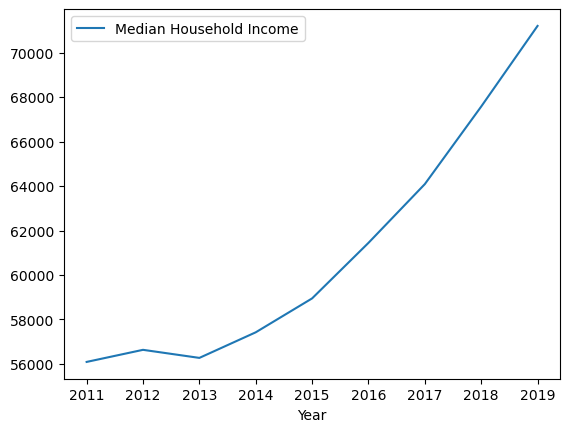

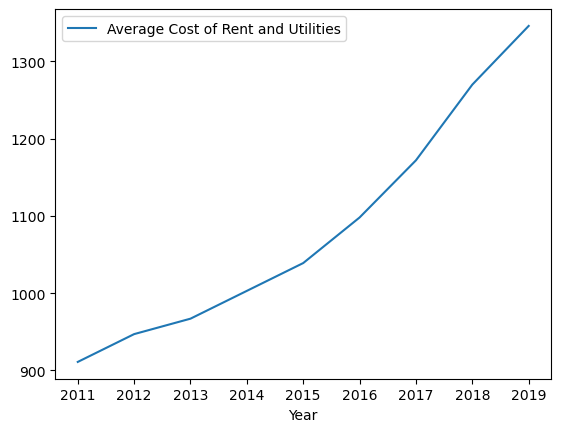

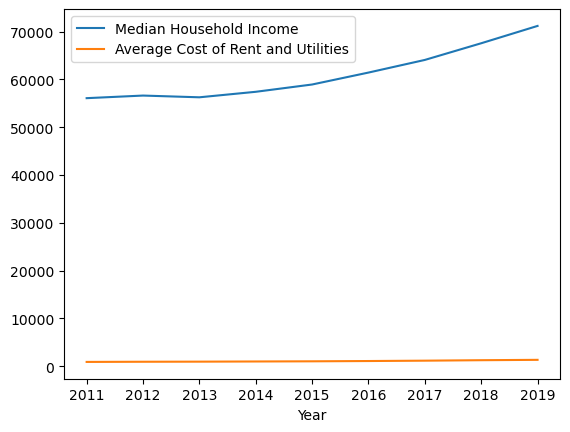

In [6]:
vis_df[["Median Household Income"]].plot()
vis_df[["Average Cost of Rent and Utilities"]].plot()
vis_df.plot()

In [7]:
#Cost of rent vs value of home ownership vs average monthly housing expense with a mortgage
#vis_df = census_df[["", "Average Cost of Rent and Utilities"]].iloc[0:9].groupby(census_df["Year"]).mean()

ex3_df = census_df[["Average Monthly Housing Expense with Mortgage", "Median Contract Rent", "Average Value of Owner-occupied Home"]].iloc[0:9].groupby(census_df["Year"]).mean()
display(ex3_df.head(30))

,Average Monthly Housing Expense with Mortgage,Median Contract Rent,Average Value of Owner-occupied Home
Year,,,
2011,1633.0,793.0,192300.0
2012,1604.0,819.0,188100.0
2013,1582.0,837.0,186600.0
2014,1545.0,871.0,189400.0
2015,1511.0,905.0,198800.0
2016,1508.0,966.0,216700.0
2017,1559.0,1040.0,241900.0
2018,1621.0,1137.0,273000.0
2019,1706.0,1205.0,307600.0


<Axes: xlabel='Year'>

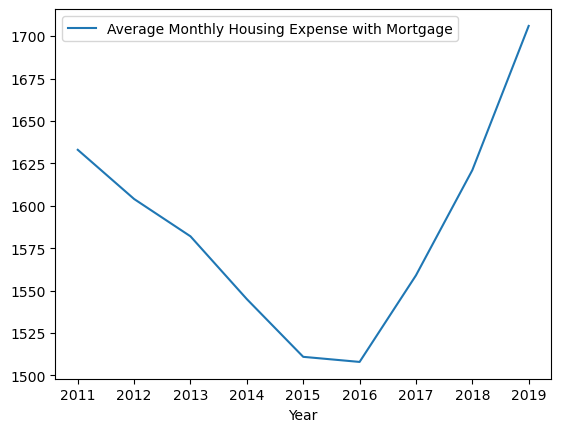

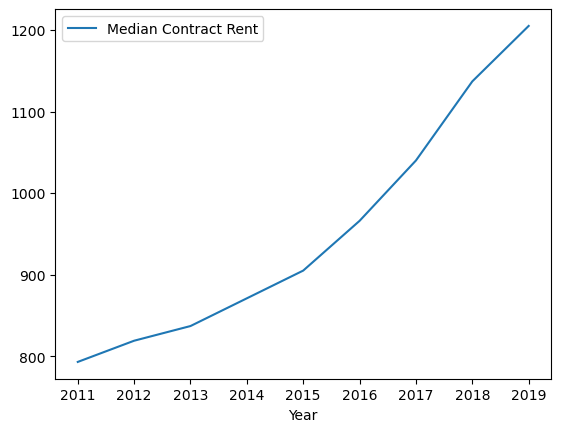

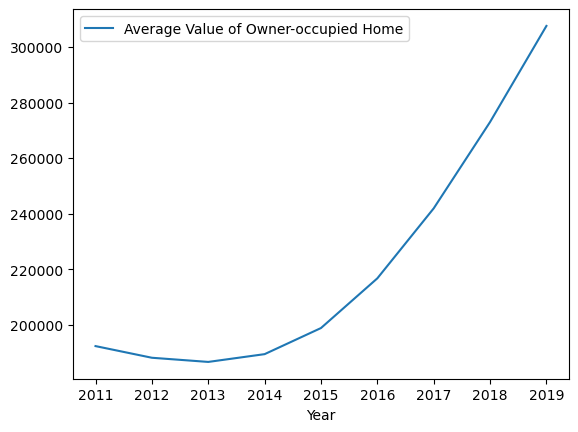

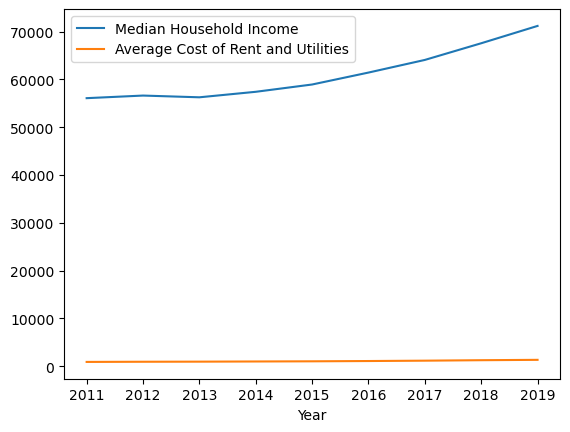

In [8]:
ex3_df[["Average Monthly Housing Expense with Mortgage"]].plot()
ex3_df[["Median Contract Rent"]].plot()
ex3_df[["Average Value of Owner-occupied Home"]].plot()
vis_df.plot()